In [23]:
# imports
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [24]:
# load data
body_embeddings = sp.load_npz("../data/body_embedding.npz")
title_embeddings = sp.load_npz("../data/title_embedding.npz")

In [25]:
pca = TruncatedSVD(n_components=50, n_iter=1)
pca_result = pca.fit_transform(body_embeddings)

In [26]:
pca_result.shape

(55550, 50)

In [27]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_result)

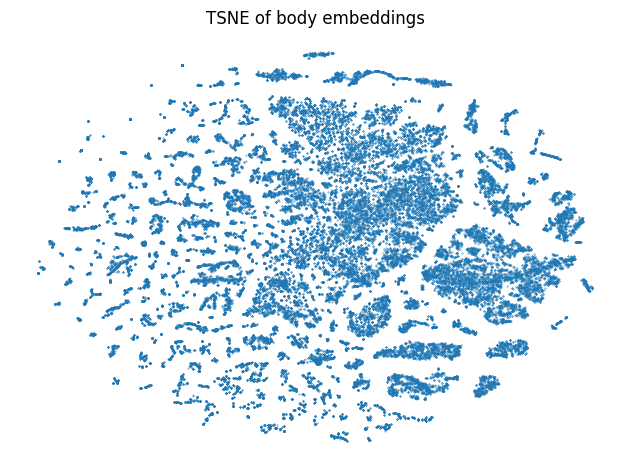

In [28]:
# Plot
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], s=0.1)
plt.title("TSNE of body embeddings")
# remove axis since they have no meaning in tsne
plt.xticks([])
plt.yticks([])
# remove all borders
plt.gca().spines[["top", "bottom", "left", "right"]].set_visible(False)
plt.savefig("../data/tsne_body.png", dpi=300)

plt.tight_layout()
plt.show()

In [29]:
# save data points
np.save("../data/tsne_result.npy", tsne_result)